In [1]:
import cv2 

girl = cv2.imread("image/girl.jpg")

girl_blue = girl.copy()
girl_blue[:,:,1] = 0
girl_blue[:,:,2] = 0

girl_red = girl.copy()
girl_red[:,:,1] = 0
girl_red[:,:,0] = 0

girl_green = girl.copy()
girl_green[:,:,0] = 0
girl_green[:,:,2] = 0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 1
output_video = 'output_video.avi'
frame_size = (girl.shape[1], girl.shape[0])
store = []
video_writer = cv2.VideoWriter(output_video, fourcc, fps, frame_size)

for i in range(20): 
    a, b = 1 + float(i/20), 0 + i
    dum_frame = girl.copy()
    for y in range(girl.shape[1]):
        for x in range(girl.shape[0]):
            z =  int(a*girl_blue[x,y,0] + b)
            if z> 255:
                z= 255
            elif z < 0:
                z = 0
            dum_frame[x,y,0] = z

            z =  int(a*girl_green[x,y,1] + b)
            if z> 255:
                z= 255
            elif z < 0:
                z = 0
            dum_frame[x,y,1] = z

            z =  int(a*girl_red[x,y,2] + b)
            if z> 255:
                z= 255
            elif z < 0:
                z = 0
            dum_frame[x,y,2] = z 

    # cv2.imshow('frame',dum_frame)
    # cv2.waitKey(0)
    video_writer.write(dum_frame)

video_writer.release()


In [2]:
import cv2 
import numpy as np
import math

girl = cv2.imread("image/girl2.jpg")

girl_blue = girl.copy()
girl_blue[:,:,1] = 0
girl_blue[:,:,2] = 0

girl_red = girl.copy()
girl_red[:,:,1] = 0
girl_red[:,:,0] = 0

girl_green = girl.copy()
girl_green[:,:,0] = 0
girl_green[:,:,2] = 0


fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 1
output_video = 'output_video_2.avi'
frame_size = (girl.shape[1], girl.shape[0])
store = []
video_writer = cv2.VideoWriter(output_video, fourcc, fps, frame_size)

for i in range(20): 
    r = 0.05 + float(i/10)
    dum_frame = np.zeros([girl.shape[0], girl.shape[1], 3], dtype=float)
    for y in range(girl.shape[1]):
        for x in range(girl.shape[0]):
            dum_frame[x,y,0] = pow(girl_blue[x,y,0],r)
            dum_frame[x,y,1] = pow(girl_green[x,y,1],r)
            dum_frame[x,y,2] = pow(girl_red[x,y,2],r)

    dum_frame_2 = np.zeros([girl.shape[0], girl.shape[1], 3], dtype=np.uint8)
    for i in range(3):
        gmin = np.min(dum_frame[:,:,i])
        gmax = np.max(dum_frame[:,:,i])
        for y in range(girl.shape[1]):
            for x in range(girl.shape[0]):
                dum_frame_2[x,y,i] = np.uint8(math.floor((255*(dum_frame[x,y,i]-gmin)/(gmax-gmin))))
    #print(dum_frame)
    
    video_writer.write(dum_frame_2)

video_writer.release()


In [3]:
print(frame_size)

(820, 507)


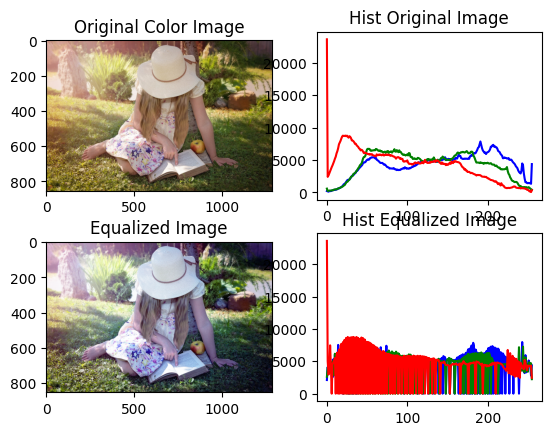

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

girl = cv2.imread("image/girl.jpg")
girl = cv2.cvtColor(girl, cv2.COLOR_BGR2RGB)

color = ('b','g','r')

plt.subplot(221)
plt.imshow(girl)
plt.title("Original Color Image")

plt.subplot(222)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([girl],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    
    plt.plot(histr, color=col)

plt.title("Hist Original Image")

plt.subplot(2,2,3)
girl_b = cv2.equalizeHist(girl[:,:,0])
girl_g = cv2.equalizeHist(girl[:,:,1])
girl_r = cv2.equalizeHist(girl[:,:,2])
girl_e = np.stack((girl_b,girl_g,girl_r), axis=2)

plt.imshow(girl_e)
plt.title("Equalized Image")
    
plt.subplot(2,2,4)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([girl_e],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    
    plt.plot(histr, color=col)

plt.title("Hist Equalized Image")
plt.show()    
     

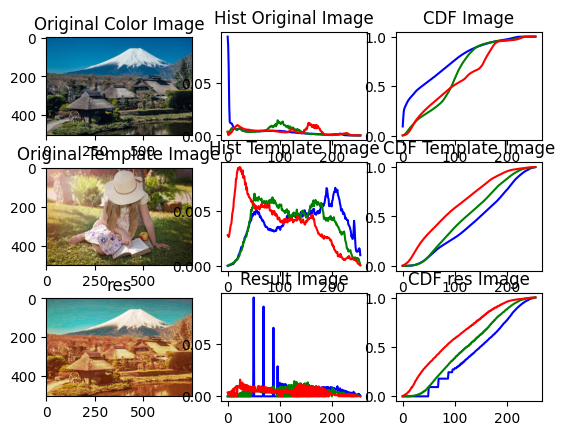

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

girl = cv2.imread("image/fuji.jpg")
girl = cv2.cvtColor(girl, cv2.COLOR_BGR2RGB)

fuji = cv2.imread("image/girl.jpg")
fuji = cv2.cvtColor(fuji, cv2.COLOR_BGR2RGB)

fuji = cv2.resize(fuji, (girl.shape[1], girl.shape[0]))

all_pixel = girl.shape[1] * girl.shape[0]

color = ('b','g','r')

plt.subplot(331)
plt.imshow(girl)
plt.title("Original Color Image")

plt.subplot(332)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([girl],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    histr = [i/all_pixel for i in histr]
    plt.plot(histr, color=col)

plt.title("Hist Original Image")

girl_sum = []

plt.subplot(333)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([girl],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    s = 0
    cdf = []
    for i in histr:
        s += i
        girl_sum.append(int(s))
        cdf.append(s/all_pixel) 
    plt.plot(cdf, color=col)

plt.title("CDF Image")

plt.subplot(334)
plt.imshow(fuji)
plt.title("Original Template Image")

plt.subplot(335)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([fuji],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    histr = [i/all_pixel for i in histr]
    plt.plot(histr, color=col)

plt.title("Hist Template Image")

fuji_sum = []

plt.subplot(336)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([fuji],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    s = 0
    cdf = []
    for i in histr:
        s += i
        fuji_sum.append(int(s))
        cdf.append(s/all_pixel) 
    plt.plot(cdf, color=col)

plt.title("CDF Template Image")

def nearest_val(val,tarr):
    thres = 10e10
    dum_dex = 0
    for i in range(len(tarr)):
        dum_thres = abs(val-tarr[i])
        if dum_thres == 0:
            return i
        elif thres >= dum_thres:
            thres = dum_thres
            dum_dex = i
    return dum_dex

#blue
girl_blue = girl[:,:,0].flatten()
fuji_blue = fuji[:,:,0].flatten()
for i in range(len(girl_blue)):
    girl_blue_cdf = girl_sum[girl_blue[i]]
    mapping = nearest_val(girl_blue_cdf, fuji_sum[0:256])
    girl_blue[i] = mapping
girl_blue = np.reshape(girl_blue,(girl.shape[0],girl.shape[1]))

#green
girl_green = girl[:,:,1].flatten()
fuji_green = fuji[:,:,1].flatten()
for i in range(len(girl_green)):
    girl_green_cdf = girl_sum[girl_green[i]+256]
    mapping = nearest_val(girl_green_cdf, fuji_sum[256:512])
    girl_green[i] = mapping
girl_green = np.reshape(girl_green,(girl.shape[0],girl.shape[1]))

#red
girl_red = girl[:,:,2].flatten()
fuji_red = fuji[:,:,2].flatten()
for i in range(len(girl_red)):
    girl_red_cdf = girl_sum[girl_red[i]+512]
    mapping = nearest_val(girl_red_cdf, fuji_sum[512:768])
    girl_red[i] = mapping
girl_red = np.reshape(girl_red,(girl.shape[0],girl.shape[1]))

#res
res = girl.copy()
res[:,:,0] = girl_blue
res[:,:,1] = girl_green
res[:,:,2] = girl_red


plt.subplot(337)
plt.imshow(res)
plt.title("res")

plt.subplot(338)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([res],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    histr = [i/all_pixel for i in histr]
    plt.plot(histr, color=col)

plt.title("Result Image")

fuji_sum = []

plt.subplot(339)

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([res],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
    s = 0
    cdf = []
    for i in histr:
        s += i
        cdf.append(s/all_pixel) 
    plt.plot(cdf, color=col)

plt.title("CDF res Image")

plt.show()
